## The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


## The dataset includes the following attributes:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [5]:
#We can assume from data that columns such as RowNumber, CustomerId, Surname will not help in prediction.
#So we can drop them to reduce the size of data

In [6]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [7]:
df.isnull().sum()    #to check no.of. null values from individual columns

CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
#dropping Null values as no.of null values are few
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()   #to check duplicate values

2

In [10]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [11]:
# drop customers where balance is 0
df.drop(df[df['Balance'] == 0].index, inplace=True)

In [12]:
#Rename 'Exiled' column to 'Churn'

df = df.rename(columns={'Exited': 'Churn'})

# Exploratory Data Analysis

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Churn Count')

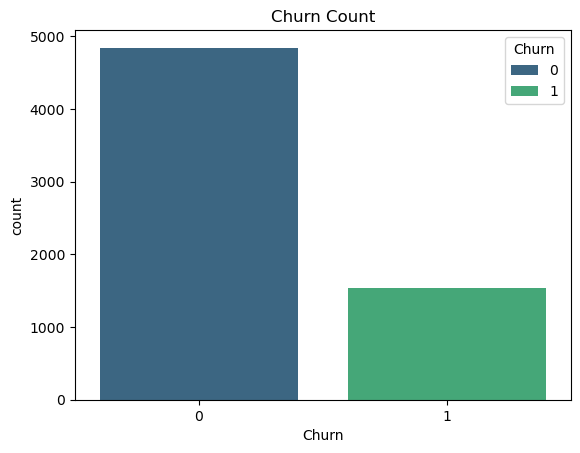

In [14]:
sns.countplot(x='Churn', data=df, palette='viridis', hue='Churn')
plt.title('Churn Count')

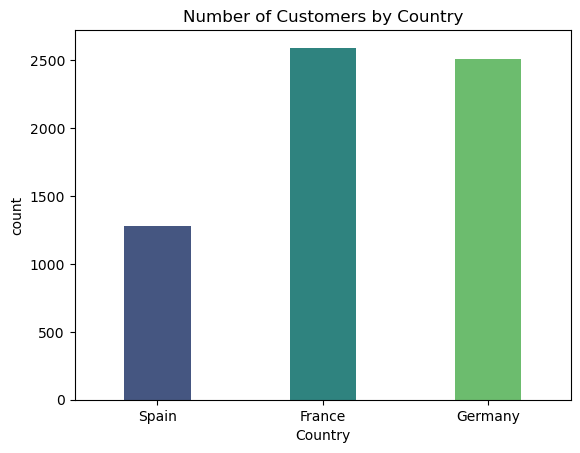

In [15]:
sns.countplot(x='Geography', data=df, palette='viridis', hue='Geography',width=0.4)
plt.title('Number of Customers by Country')
plt.xlabel('Country')
plt.show()
#this graph shows the country wise customers count. Count of customers from Spain is comparatively less than France and Germany

<Axes: title={'center': 'Gender Count'}, xlabel='Gender'>

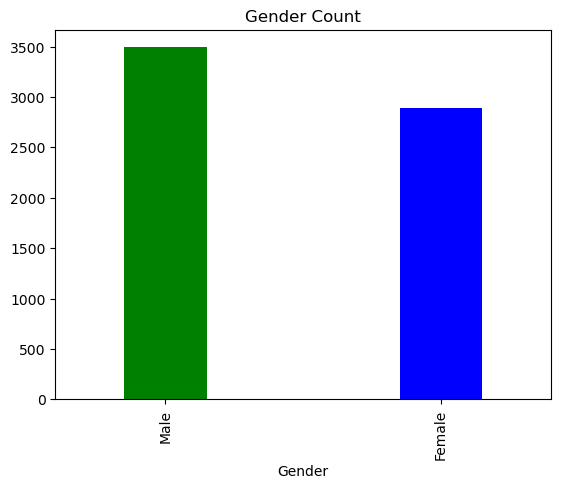

In [16]:
df['Gender'].value_counts().plot(kind='bar',color=['Green','Blue'],width=0.3, title='Gender Count')
#from the graph we can conclude that the number of male customers is more than female customers

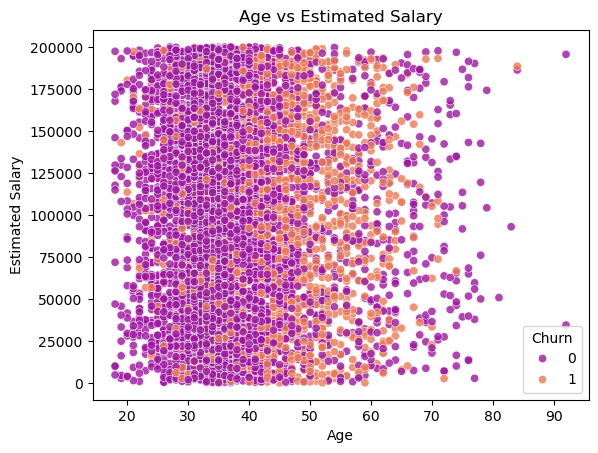

In [17]:
sns.scatterplot(x='Age', y='EstimatedSalary', data=df, palette='plasma', hue='Churn', markers='o', alpha=0.8)
plt.title('Age vs Estimated Salary')
plt.ylabel('Estimated Salary')
plt.show()
#By examining the below scatterplot we can conclude that the people below 40years will probably left the bank

# Data Processing

#### convrting individual age to age group which will help in indentifying age group

In [18]:
df['Age'] = df['Age'].astype(int)

bins = [10, 25, 40, 60, 100]
labels = [1, 2, 3, 4]
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


In [19]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,AgeGroup
1,608,Spain,Female,41,1,83807.86,1,0.0,1.0,112542.58,0,3
2,502,France,Female,42,8,159660.80,3,1.0,0.0,113931.57,1,3
5,645,Spain,Male,44,8,113755.78,2,1.0,0.0,149756.71,1,3
7,376,Germany,Female,29,4,115046.74,4,1.0,0.0,119346.88,1,2
10,528,France,Male,31,6,102016.72,2,0.0,0.0,80181.12,0,2


#### Droping columns which will not help in prediction

In [20]:
df.drop(['Age', 'Tenure', 'HasCrCard'], axis=1, inplace=True)

## Encoding

In [21]:
from sklearn.preprocessing import OrdinalEncoder    
 
oe=OrdinalEncoder()
df[['Geography','Gender']]=oe.fit_transform(df[['Geography','Gender']])

In [22]:
df

,CreditScore,Geography,Gender,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Churn,AgeGroup
1,608,2.0,0.0,83807.86,1,1.0,112542.58,0,3
2,502,0.0,0.0,159660.80,3,0.0,113931.57,1,3
5,645,2.0,1.0,113755.78,2,0.0,149756.71,1,3
7,376,1.0,0.0,115046.74,4,0.0,119346.88,1,2
10,528,0.0,1.0,102016.72,2,0.0,80181.12,0,2
...,...,...,...,...,...,...,...,...,...
9991,597,0.0,0.0,88381.21,1,0.0,69384.71,1,3
9993,644,0.0,1.0,155060.41,1,0.0,29179.52,0,2
9996,516,0.0,1.0,57369.61,1,1.0,101699.77,0,2
9998,772,1.0,1.0,75075.31,2,0.0,92888.52,1,3


## Separating Features and Target column of Dataset

In [23]:
x = df.drop('Churn', axis=1)
y = df['Churn']

In [24]:
x.head()

,CreditScore,Geography,Gender,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,AgeGroup
1,608,2.0,0.0,83807.86,1,1.0,112542.58,3
2,502,0.0,0.0,159660.80,3,0.0,113931.57,3
5,645,2.0,1.0,113755.78,2,0.0,149756.71,3
7,376,1.0,0.0,115046.74,4,0.0,119346.88,2
10,528,0.0,1.0,102016.72,2,0.0,80181.12,2


In [25]:
y.head()

1     0
2     1
5     1
7     1
10    0
Name: Churn, dtype: int64

# Splitting training and testing data 

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)  

# Model Building

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

### Logistic Regression

In [28]:
logreg=LogisticRegression()

In [29]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    cr=classification_report(ytest,ypred)
    
    print(cr)
    print('Accuracy is:',ac)

In [30]:
mymodel(logreg)


              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1466
           1       0.53      0.24      0.33       448

    accuracy                           0.77      1914
   macro avg       0.67      0.59      0.60      1914
weighted avg       0.74      0.77      0.74      1914

Accuracy is: 0.7727272727272727


In [31]:
print('Testing Score',logreg.score(xtest,ytest))
print('Training Score',logreg.score(xtrain,ytrain))

Testing Score 0.7727272727272727
Training Score 0.7731751007613077


### Hypertunning

In [32]:
from sklearn.model_selection import GridSearchCV
param_grid={'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky','sag']}
gs=GridSearchCV(logreg,param_grid,verbose=3)
gs.fit(xtrain,ytrain)
ypred=gs.predict(xtest)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ......................solver=lbfgs;, score=0.772 total time=   0.0s
[CV 2/5] END ......................solver=lbfgs;, score=0.763 total time=   0.0s
[CV 3/5] END ......................solver=lbfgs;, score=0.753 total time=   0.0s
[CV 4/5] END ......................solver=lbfgs;, score=0.764 total time=   0.0s
[CV 5/5] END ......................solver=lbfgs;, score=0.773 total time=   0.0s
[CV 1/5] END ..................solver=liblinear;, score=0.756 total time=   0.0s
[CV 2/5] END ..................solver=liblinear;, score=0.756 total time=   0.0s
[CV 3/5] END ..................solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END ..................solver=liblinear;, score=0.756 total time=   0.0s
[CV 5/5] END ..................solver=liblinear;, score=0.757 total time=   0.0s
[CV 1/5] END ..................solver=newton-cg;, score=0.761 total time=   0.1s
[CV 2/5] END ..................solver=newton-cg;,

In [33]:
gs.best_estimator_

LogisticRegression(solver='newton-cholesky')

In [44]:
logreg1= LogisticRegression(penalty='l1',solver='liblinear')
mymodel(logreg1)
print('Testing Score',logreg.score(xtest,ytest))
print('Training Score',logreg.score(xtrain,ytrain))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1466
           1       0.54      0.24      0.33       448

    accuracy                           0.77      1914
   macro avg       0.67      0.59      0.60      1914
weighted avg       0.74      0.77      0.74      1914

Accuracy is: 0.7737722048066875
Testing Score 0.7727272727272727
Training Score 0.7731751007613077


## With Logistic regression we got accuracy of 77.27% but after hypertunning we got 77.37% accuracy where penalty is l1 and solver is liblinear

## SVM

In [46]:
from sklearn.svm import SVC
svm=SVC()

In [47]:
mymodel(svm)

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1466
           1       0.00      0.00      0.00       448

    accuracy                           0.77      1914
   macro avg       0.38      0.50      0.43      1914
weighted avg       0.59      0.77      0.66      1914

Accuracy is: 0.7659352142110762


In [48]:
print('Testing Score',svm.score(xtest,ytest))
print('Training Score',svm.score(xtrain,ytrain))

Testing Score 0.7659352142110762
Training Score 0.7561576354679803


### Hypertunning

In [49]:
param_grid={'C':[0.001],'gamma':[1,1000],'kernel':['rbf','sigmoid']}

In [50]:
gs=GridSearchCV(svm,param_grid,verbose=3)
gs.fit(xtrain,ytrain)
ypred=gs.predict(xtest)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.756 total time=   0.8s
[CV 2/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.756 total time=   1.1s
[CV 3/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.756 total time=   1.3s
[CV 4/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.756 total time=   4.5s
[CV 5/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.757 total time=   4.4s
[CV 1/5] END ..C=0.001, gamma=1, kernel=sigmoid;, score=0.756 total time=   0.2s
[CV 2/5] END ..C=0.001, gamma=1, kernel=sigmoid;, score=0.756 total time=   0.4s
[CV 3/5] END ..C=0.001, gamma=1, kernel=sigmoid;, score=0.756 total time=   0.2s
[CV 4/5] END ..C=0.001, gamma=1, kernel=sigmoid;, score=0.756 total time=   0.1s
[CV 5/5] END ..C=0.001, gamma=1, kernel=sigmoid;, score=0.757 total time=   0.2s
[CV 1/5] END ...C=0.001, gamma=1000, kernel=rbf;, score=0.756 total time=   4.1s
[CV 2/5] END ...C=0.001, gamma=1000, kernel=rbf;,

In [51]:
gs.best_estimator_

SVC(C=0.001, gamma=1)

In [74]:
svm=gs.best_estimator_
mymodel(svm)
print('Testing Score',svm.score(xtest,ytest)*100)
print('Training Score',svm.score(xtrain,ytrain)*100)

              precision    recall  f1-score   support

           0       0.77      0.97      0.86      1466
           1       0.34      0.04      0.08       448

    accuracy                           0.76      1914
   macro avg       0.56      0.51      0.47      1914
weighted avg       0.67      0.76      0.68      1914

Accuracy is: 0.7565308254963428
Testing Score 75.65308254963428
Training Score 76.33228840125392


In [75]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe=Pipeline(steps=[('scaler',StandardScaler()),('svm',SVC(kernel='poly'))])
mymodel(pipe)
print('Testing Score',svm.score(xtest,ytest)*100)
print('Training Score',svm.score(xtrain,ytrain)*100)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1466
           1       0.70      0.34      0.46       448

    accuracy                           0.81      1914
   macro avg       0.76      0.65      0.67      1914
weighted avg       0.80      0.81      0.79      1914

Accuracy is: 0.8119122257053292
Testing Score 75.65308254963428
Training Score 76.33228840125392


## With SVC we got accuracy of 76.59% but after hypertunning we got 76.59% accuracy where C parameter is 0.001 and gama parameter 1 where both training and testing scores (if training score is 100% this means my model is overfitting)are nearly equal. But when pipeline is build with standard scalar and svc where kernel is poly we got 81.19% accuracy with nearly same train test score which is best accuracy amongst all 

# Decision Tree 

In [52]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [53]:
mymodel(dt)
print('Testing Score',svm.score(xtest,ytest)*100)
print('Training Score',svm.score(xtrain,ytrain)*100)

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1466
           1       0.44      0.49      0.46       448

    accuracy                           0.74      1914
   macro avg       0.64      0.65      0.64      1914
weighted avg       0.75      0.74      0.74      1914

Accuracy is: 0.7351097178683386
Testing Score 76.59352142110762
Training Score 75.61576354679804


### Applying Prunning techniques to increase accuracy

In [54]:
for i in range(1,30):
    dt1=DecisionTreeClassifier(max_depth=i)
    dt1.fit(xtrain,ytrain)
    ypred=dt1.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    print(f'at{i} accuracy is {ac}')

at1 accuracy is 0.7659352142110762
at2 accuracy is 0.7925809822361547
at3 accuracy is 0.7910135841170324
at4 accuracy is 0.8077324973876698
at5 accuracy is 0.8082549634273772
at6 accuracy is 0.8082549634273772
at7 accuracy is 0.8098223615464994
at8 accuracy is 0.8082549634273772
at9 accuracy is 0.8040752351097179
at10 accuracy is 0.8009404388714734
at11 accuracy is 0.7941483803552769
at12 accuracy is 0.7831765935214211
at13 accuracy is 0.7711598746081505
at14 accuracy is 0.7716823406478579
at15 accuracy is 0.7659352142110762
at16 accuracy is 0.7596656217345873
at17 accuracy is 0.7492163009404389
at18 accuracy is 0.7518286311389759
at19 accuracy is 0.7424242424242424
at20 accuracy is 0.7424242424242424
at21 accuracy is 0.7351097178683386
at22 accuracy is 0.7403343782654127
at23 accuracy is 0.7398119122257053
at24 accuracy is 0.7434691745036572
at25 accuracy is 0.7434691745036572
at26 accuracy is 0.7335423197492164
at27 accuracy is 0.7361546499477534
at28 accuracy is 0.7351097178683386
a

#### Rebulding model at max depth=6

In [55]:
dt2=DecisionTreeClassifier(max_depth=3)
mymodel(dt2)
print('Testing Score',dt2.score(xtest,ytest)*100)
print('Training Score',dt2.score(xtrain,ytrain)*100)

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1466
           1       0.55      0.55      0.55       448

    accuracy                           0.79      1914
   macro avg       0.71      0.71      0.71      1914
weighted avg       0.79      0.79      0.79      1914

Accuracy is: 0.7910135841170324
Testing Score 79.10135841170323
Training Score 79.42230183609495


In [56]:
# Acurracy is 79.10% with almost similar testing and trainig score.

In [57]:
for i in range(30,44):
    dt3=DecisionTreeClassifier(min_samples_leaf=i)
    dt3.fit(xtrain,ytrain)
    ypred=dt3.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    print(f'at{i} accuracy is {ac}')

at30 accuracy is 0.8035527690700105
at31 accuracy is 0.8035527690700105
at32 accuracy is 0.8150470219435737
at33 accuracy is 0.8150470219435737
at34 accuracy is 0.8145245559038663
at35 accuracy is 0.8145245559038663
at36 accuracy is 0.8150470219435737
at37 accuracy is 0.8150470219435737
at38 accuracy is 0.8140020898641588
at39 accuracy is 0.8145245559038663
at40 accuracy is 0.8113897596656218
at41 accuracy is 0.8119122257053292
at42 accuracy is 0.8119122257053292
at43 accuracy is 0.8119122257053292


#### Rebulding model at min_samples_leaf=190

In [58]:
dt3=DecisionTreeClassifier(min_samples_leaf=190)
mymodel(dt3)
print('Testing Score',dt3.score(xtest,ytest)*100)
print('Training Score',dt3.score(xtrain,ytrain)*100)

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1466
           1       0.58      0.22      0.32       448

    accuracy                           0.78      1914
   macro avg       0.69      0.59      0.59      1914
weighted avg       0.75      0.78      0.74      1914

Accuracy is: 0.780564263322884
Testing Score 78.0564263322884
Training Score 78.41468875951635


In [59]:
# Acurracy is 78.05% with almost similar testing and trainig score.

In [60]:
for i in range(400,420):
    dt5=DecisionTreeClassifier(min_samples_split=i)
    dt5.fit(xtrain,ytrain)
    ypred=dt5.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    print(f'at{i} accuracy is {ac}')

at400 accuracy is 0.8035527690700105
at401 accuracy is 0.8019853709508882
at402 accuracy is 0.8019853709508882
at403 accuracy is 0.8035527690700105
at404 accuracy is 0.8035527690700105
at405 accuracy is 0.8035527690700105
at406 accuracy is 0.8035527690700105
at407 accuracy is 0.8035527690700105
at408 accuracy is 0.8035527690700105
at409 accuracy is 0.8035527690700105
at410 accuracy is 0.8035527690700105
at411 accuracy is 0.8035527690700105
at412 accuracy is 0.8035527690700105
at413 accuracy is 0.8061650992685475
at414 accuracy is 0.8061650992685475
at415 accuracy is 0.8061650992685475
at416 accuracy is 0.8061650992685475
at417 accuracy is 0.8061650992685475
at418 accuracy is 0.8061650992685475
at419 accuracy is 0.8061650992685475


#### Rebulding model at min_samples_split=412

In [61]:
dt5=DecisionTreeClassifier(min_samples_split=412)
mymodel(dt5)
print('Testing Score',dt5.score(xtest,ytest)*100)
print('Training Score',dt5.score(xtrain,ytrain)*100)

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1466
           1       0.65      0.35      0.46       448

    accuracy                           0.80      1914
   macro avg       0.74      0.65      0.67      1914
weighted avg       0.78      0.80      0.78      1914

Accuracy is: 0.8035527690700105
Testing Score 80.35527690700106
Training Score 81.84057321988357


In [62]:
# Acurracy is 80.35% with almost similar testing and trainig score.

### Decision Tree classifier gave accuracy of 73.61% after this prunning techniques were applied and rebuilded model which gave accuracy of
### 79.10% at (max depth=6), 78.05% at (min_samples_leaf=190) and 80.35% at (min_samples_split=412).Through this observation we can say that 
### best accuracy with Decision Tree classifier is 80.35%

# KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
mymodel(knn)
print('Testing Score',dt5.score(xtest,ytest)*100)
print('Training Score',dt5.score(xtrain,ytrain)*100)

              precision    recall  f1-score   support

           0       0.77      0.91      0.83      1466
           1       0.27      0.11      0.16       448

    accuracy                           0.72      1914
   macro avg       0.52      0.51      0.49      1914
weighted avg       0.65      0.72      0.67      1914

Accuracy is: 0.722048066875653
Testing Score 80.35527690700106
Training Score 81.84057321988357


In [64]:
param_grid={'n_neighbors':[7,9,11,13],'weights':['uniform', 'distance'],'leaf_size':[12]}

In [65]:
gs=GridSearchCV(knn,param_grid,verbose=3)
gs.fit(xtrain,ytrain)
ypred=gs.predict(xtest)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END leaf_size=12, n_neighbors=7, weights=uniform;, score=0.719 total time=   0.0s
[CV 2/5] END leaf_size=12, n_neighbors=7, weights=uniform;, score=0.745 total time=   0.0s
[CV 3/5] END leaf_size=12, n_neighbors=7, weights=uniform;, score=0.721 total time=   0.0s
[CV 4/5] END leaf_size=12, n_neighbors=7, weights=uniform;, score=0.740 total time=   0.0s
[CV 5/5] END leaf_size=12, n_neighbors=7, weights=uniform;, score=0.716 total time=   0.0s
[CV 1/5] END leaf_size=12, n_neighbors=7, weights=distance;, score=0.698 total time=   0.0s
[CV 2/5] END leaf_size=12, n_neighbors=7, weights=distance;, score=0.711 total time=   0.0s
[CV 3/5] END leaf_size=12, n_neighbors=7, weights=distance;, score=0.703 total time=   0.0s
[CV 4/5] END leaf_size=12, n_neighbors=7, weights=distance;, score=0.720 total time=   0.0s
[CV 5/5] END leaf_size=12, n_neighbors=7, weights=distance;, score=0.700 total time=   0.0s
[CV 1/5] END leaf_size=12

In [66]:
gs.best_estimator_

KNeighborsClassifier(leaf_size=12, n_neighbors=13)

In [67]:
knn= KNeighborsClassifier(n_neighbors=15)
mymodel(knn)
print('Testing Score',dt5.score(xtest,ytest)*100)
print('Training Score',dt5.score(xtrain,ytrain)*100)

              precision    recall  f1-score   support

           0       0.77      0.98      0.86      1466
           1       0.36      0.04      0.07       448

    accuracy                           0.76      1914
   macro avg       0.57      0.51      0.47      1914
weighted avg       0.67      0.76      0.68      1914

Accuracy is: 0.7591431556948798
Testing Score 80.35527690700106
Training Score 81.84057321988357


## With KNeighbourClassifier we got accuracy of 72.20% but after hypertunning we got 75.91% accuracy where n_neighbors=15 which is by default 10

# Bagging(Voting Classifier)

In [68]:
from sklearn.ensemble import VotingClassifier

In [69]:
new_model=[]
new_model.append(('svm',SVC(C=0.001, gamma=1)))
new_model.append(('dt',DecisionTreeClassifier(max_depth=10)))

In [70]:
vc=VotingClassifier(estimators=new_model)
mymodel(vc)
print('Testing Score',vc.score(xtest,ytest)*100)
print('Training Score',vc.score(xtrain,ytrain)*100)

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1466
           1       0.00      0.00      0.00       448

    accuracy                           0.77      1914
   macro avg       0.38      0.50      0.43      1914
weighted avg       0.59      0.77      0.66      1914

Accuracy is: 0.7659352142110762
Testing Score 76.59352142110762
Training Score 75.61576354679804


In [71]:
new_model=[]
new_model.append(('logreg',LogisticRegression(solver='newton-cg')))
new_model.append(('dt',DecisionTreeClassifier(max_depth=6)))
vc=VotingClassifier(estimators=new_model)
mymodel(vc)
print('Testing Score',vc.score(xtest,ytest)*100)
print('Training Score',vc.score(xtrain,ytrain)*100)

              precision    recall  f1-score   support

           0       0.79      0.98      0.88      1466
           1       0.73      0.16      0.26       448

    accuracy                           0.79      1914
   macro avg       0.76      0.57      0.57      1914
weighted avg       0.78      0.79      0.73      1914

Accuracy is: 0.7889237199582028
Testing Score 78.89237199582027
Training Score 78.79534258844603


In [72]:
new_model=[]
new_model.append(('logreg',LogisticRegression(solver='sag')))
new_model.append(('svm',DecisionTreeClassifier()))
vc=VotingClassifier(estimators=new_model)
mymodel(vc)
print('Testing Score',vc.score(xtest,ytest)*100)
print('Training Score',vc.score(xtrain,ytrain)*100)

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1466
           1       0.00      0.00      0.00       448

    accuracy                           0.77      1914
   macro avg       0.38      0.50      0.43      1914
weighted avg       0.59      0.77      0.66      1914

Accuracy is: 0.7659352142110762
Testing Score 76.59352142110762
Training Score 75.61576354679804


## With Bagging(VotingClassifier) we got accuracy of 76.59%(with svc and decision tree) 
## 78.89%(with logistic regression and decision tree) and 76.59 (with logistic regression and svc)

In [79]:
Accuracy={'Accuracy':[77.37,81.19,80.35,75.91,78.89]}
Model=['Logistic Regression','SupportVectorClassifier','DecisionTreeClassifier','KNeighborsClassifier','VotingClassifier']

In [80]:
df3=pd.DataFrame(Accuracy,index=Model)
df3

,Accuracy
Logistic Regression,77.37
SupportVectorClassifier,81.19
DecisionTreeClassifier,80.35
KNeighborsClassifier,75.91
VotingClassifier,78.89


## Support Vector Classifier is giving highest accuracy. we can conclude that SVC is best model/